In [1]:
# Import the Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
data = pd.read_csv("Airline Dataset Updated.csv")

In [3]:
#Preview the first 5 rows of dataset
data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


You can see that there are categorical data,geographical data and numerical data.
Next, we will use the data.shape and data.info() to get more information.

In [4]:
# Shape of the dataset
data.shape

(98619, 15)

In [5]:
# Summerized information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

There are 98619 rows and 15 columns in the dataset.
We require to change the dtype of Departure Date from object to date.


In [6]:
#Handling Missing Values
#Next we will find out whether there is Null values.
data.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

The result set shows that there are no null values

In [7]:
# Find the number of duplicate data
data.duplicated().sum()

0

There are no duplicates in the dataset

In [8]:
#The changing the datatype of Departure Date from object to Datetime
data['Departure Date'] = pd.to_datetime(data['Departure Date'])
print(data.dtypes)

Passenger ID                    object
First Name                      object
Last Name                       object
Gender                          object
Age                              int64
Nationality                     object
Airport Name                    object
Airport Country Code            object
Country Name                    object
Airport Continent               object
Continents                      object
Departure Date          datetime64[ns]
Arrival Airport                 object
Pilot Name                      object
Flight Status                   object
dtype: object


In [9]:
# Droping the columns
data.drop(columns=['Airport Country Code','Airport Continent'],inplace = True)

In [10]:
data

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Country Name,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,United States,North America,2022-06-28,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,2022-12-26,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,France,Europe,2022-01-18,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,2022-09-16,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,United States,North America,2022-02-25,SEE,Bay Pencost,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,Norway,Europe,2022-12-11,HAA,Gareth Mugford,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,2022-10-30,IVA,Kasey Benedict,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,2022-09-10,ABC,Darrin Lucken,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,2022-10-26,GGN,Gayle Lievesley,Cancelled


Columns have been dropped and datatype has been changed

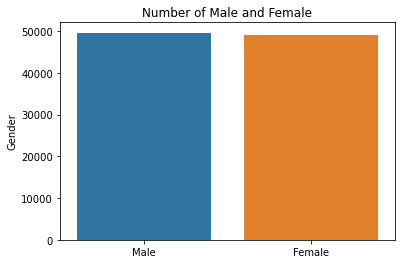

In [12]:
#How many Male and Female Travel
x = data.Gender.value_counts()
x.index

sns.barplot(x=x.index,y=x)
plt.title('Number of Male and Female')
plt.show()

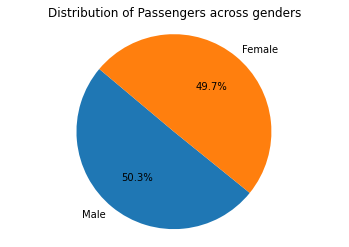

In [13]:
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passengers across genders')
plt.axis('equal')
plt.show()

According to the chart ,49598 Male have Travelled which is 50.3% and 49021 Female have Travelled which is 49.7%
In conclusion ,Male are more than Female

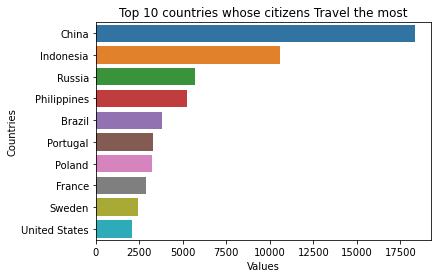

In [14]:
#Top 10 countries whose citizens Travel the most
y = data.Nationality.value_counts().head(10)
sns.barplot(x=y,y=y.index,orient='horizontal')
plt.xlabel('Values')
plt.ylabel('Countries')
plt.title('Top 10 countries whose citizens Travel the most')
plt.show()

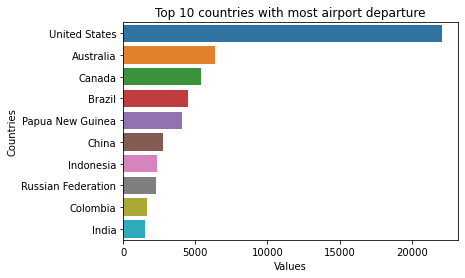

In [17]:
#Top 10 countries most visited
z = data['Country Name'].value_counts().head(10)
sns.barplot(x=z,y=z.index,orient='horizontal')
plt.xlabel('Values')
plt.ylabel('Countries')
plt.title('Top 10 countries with most airport departure')
plt.show()

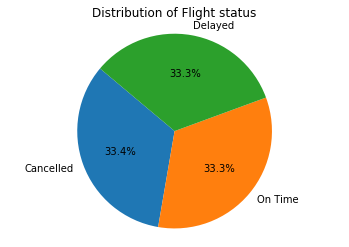

In [18]:
# How many flights were on time ,delayed or cancelled
a = data['Flight Status'].value_counts()

plt.pie(a, labels=a.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Flight status')
plt.axis('equal')
plt.show()

(array([16373., 16557., 16306., 16611., 16457., 16315.]),
 array([ 1.        , 15.83333333, 30.66666667, 45.5       , 60.33333333,
        75.16666667, 90.        ]),
 <BarContainer object of 6 artists>)

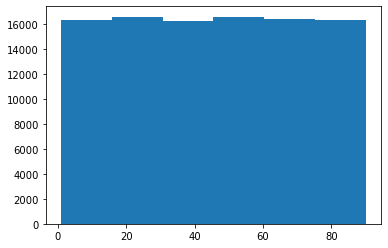

In [29]:
# Age
age = data['Age']
plt.hist(age,bins=6)

Conclusions:
1)

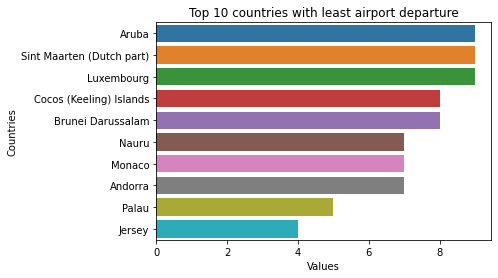

In [28]:
#10 countries Least visited
d = data['Country Name'].sort_values().value_counts().tail(10)
sns.barplot(x=d,y=d.index,orient='horizontal')
plt.xlabel('Values')
plt.ylabel('Countries')
plt.title('Top 10 countries with least airport departure')
plt.show()